In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error

In [3]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    
    mask_fixedacid = df["fixed acidity"] < 15
    mask_volatileacid = df["volatile acidity"] < 14
    mask_citricacid = df["citric acid"] < 0.9 
    mask_residualsugar = df["residual sugar"] < 14
    mask_chlorides = df["chlorides"] < 0.5 
    mask_freesulfurdioxide = df["free sulfur dioxide"] < 60
    mask_totalsulfurdioxide = df["total sulfur dioxide"] < 250
    mask_ph = (df["pH"] > 2.8) & (df["pH"] < 3.9)
    mask_sulphates = df["sulphates"] < 1.75
    #mask_alchol = df["alcohol"] < 14.5
    #mask_quality = (df["quality"] > 3.5) & (df["quality"] < 7.5)
    
    df = df[mask_fixedacid & mask_volatileacid & mask_citricacid & mask_residualsugar &
           mask_chlorides & mask_freesulfurdioxide & mask_totalsulfurdioxide & mask_ph &
           mask_sulphates]

    return df


In [4]:
df = wrangle("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df["pH"].value_counts()

3.30    57
3.36    56
3.26    53
3.39    48
3.38    48
        ..
3.74     1
2.87     1
2.92     1
3.70     1
2.90     1
Name: pH, Length: 84, dtype: int64

In [6]:
df["pH"].nunique()

84

In [7]:
df.isnull().sum() / len(df)

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [8]:
df.shape

(1574, 12)

In [9]:
df.nunique()

fixed acidity            91
volatile acidity        143
citric acid              79
residual sugar           87
chlorides               149
free sulfur dioxide      55
total sulfur dioxide    140
density                 429
pH                       84
sulphates                92
alcohol                  64
quality                   6
dtype: int64

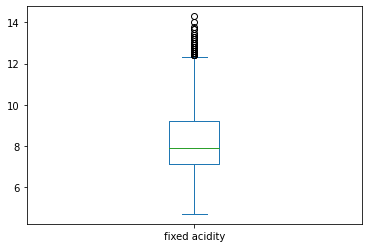

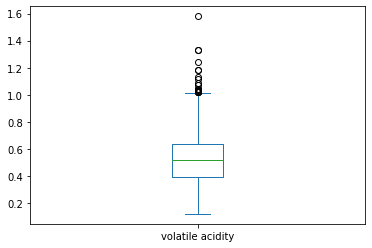

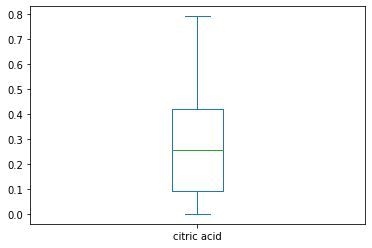

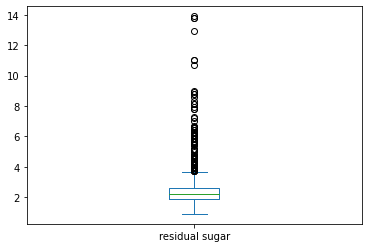

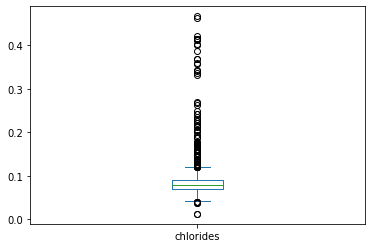

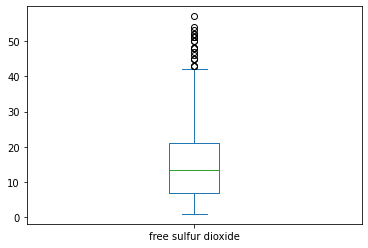

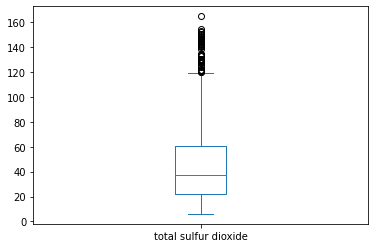

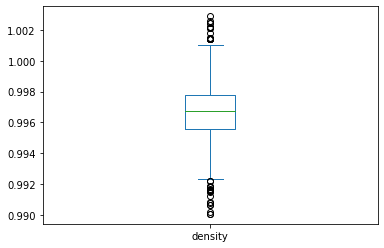

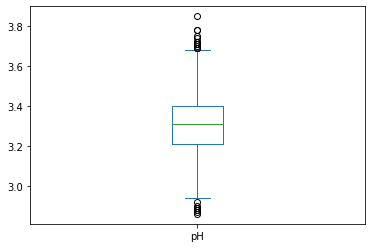

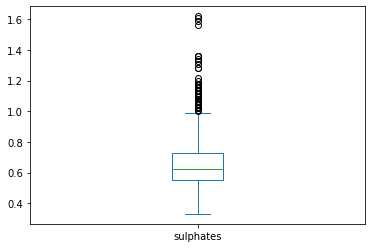

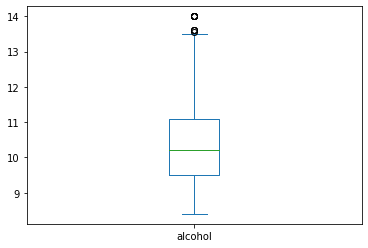

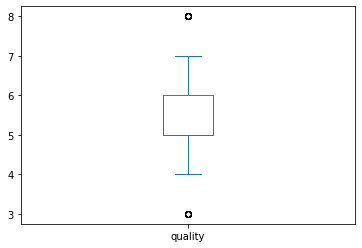

In [10]:
for col in df.columns:
    df[col].plot(kind="box")
    plt.show()


In [11]:
corr = df.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.262697,0.680669,0.103127,0.098264,-0.151621,-0.109443,0.660914,-0.682457,0.185106,-0.065920,0.125446
volatile acidity,-0.262697,1.000000,-0.557275,0.018656,0.069200,-0.013309,0.092338,0.021319,0.234757,-0.279865,-0.208844,-0.390938
citric acid,0.680669,-0.557275,1.000000,0.139461,0.176562,-0.065256,0.020572,0.363617,-0.531286,0.315494,0.113452,0.231534
residual sugar,0.103127,0.018656,0.139461,1.000000,0.025874,0.096907,0.149817,0.338714,-0.054393,0.012762,0.060695,0.013543
chlorides,0.098264,0.069200,0.176562,0.025874,1.000000,-0.027635,0.042964,0.191597,-0.247496,0.339488,-0.218932,-0.118295
free sulfur dioxide,-0.151621,-0.013309,-0.065256,0.096907,-0.027635,1.000000,0.669615,-0.043104,0.082897,0.055947,-0.066196,-0.052653
total sulfur dioxide,-0.109443,0.092338,0.020572,0.149817,0.042964,0.669615,1.000000,0.089954,-0.045649,0.014790,-0.232659,-0.209759
density,0.660914,0.021319,0.363617,0.338714,0.191597,-0.043104,0.089954,1.000000,-0.316262,0.142975,-0.502144,-0.178945
pH,-0.682457,0.234757,-0.531286,-0.054393,-0.247496,0.082897,-0.045649,-0.316262,1.000000,-0.148656,0.200657,-0.059638
sulphates,0.185106,-0.279865,0.315494,0.012762,0.339488,0.055947,0.014790,0.142975,-0.148656,1.000000,0.122939,0.289066


Text(0, 0.5, 'quality score')

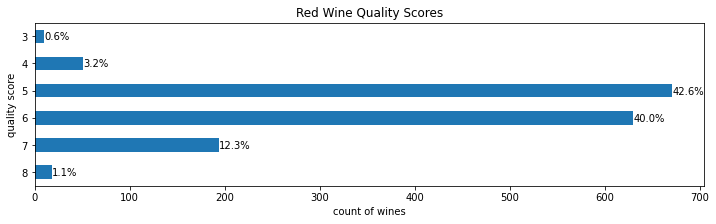

In [12]:
ax = df.quality.value_counts().sort_index(ascending=False).plot.barh(title='Red Wine Quality Scores', figsize=(12, 3))

for bar in ax.patches:
    ax.text(bar.get_width(),
            bar.get_y() + bar.get_height()/4,f'{bar.get_width()/df.shape[0]:.1%}')
plt.xlabel('count of wines')
plt.ylabel('quality score')

Text(0.5, 0, 'quality score')

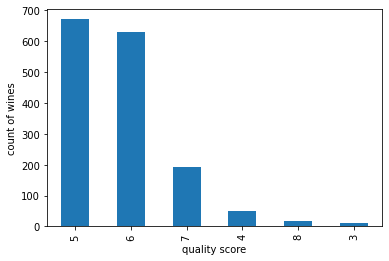

In [13]:
df["quality"].value_counts().sort_values(ascending=False).plot(
    kind = "bar"
)
plt.ylabel('count of wines')
plt.xlabel('quality score')

Text(0.5, 0, 'quality score')

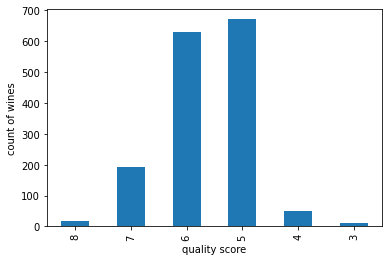

In [14]:
df["quality"].value_counts().sort_index(ascending=False).plot(
    kind = "bar"
)
plt.ylabel('count of wines')
plt.xlabel('quality score')

<AxesSubplot:xlabel='quality', ylabel='quality'>

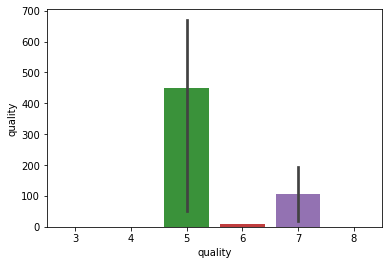

In [15]:
sns.barplot(x = df["quality"].sort_index(), y=df["quality"].value_counts())

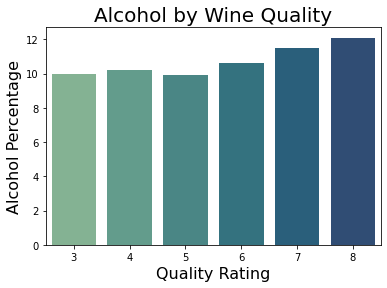

In [16]:
sns.barplot(x = 'quality', y = 'alcohol', data = df, palette="crest", ci = None)
plt.xlabel("Quality Rating", fontsize = 16)
plt.ylabel("Alcohol Percentage", fontsize = 16)
plt.title("Alcohol by Wine Quality", fontsize = 20)
plt.show()

In [17]:
target = "quality"
X = df.drop(columns = target)
y = df[target]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
lr_train_accuracy = model.score(X_train, y_train)
print(lr_train_accuracy)

0.37107203954691714


In [21]:
lr_val_accuracy = model.score(X_val, y_val)
print(lr_val_accuracy)

0.3812583003072444


In [22]:
model_r = Ridge()
model_r.fit(X_train, y_train)

Ridge()

In [23]:
r_train_accuracy = model_r.score(X_train, y_train)
print(r_train_accuracy)

0.36994192351959365


In [24]:
r_val_accuracy = model_r.score(X_val, y_val)
print(r_val_accuracy)

0.37831518128526664


In [25]:
y_pred_baseline = [y_train.mean()] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print(mae_baseline, y_train.mean())

0.6821089900137596 5.613979348689436


In [26]:
y_pred_training = model.predict(X_train)
mae_training = mean_absolute_error(y_train, y_pred_training)
print(mae_training)

0.49291408652030055


In [27]:
y_pred_test = model.predict(X_val)
mae_test = mean_absolute_error(y_val, y_pred_test)
print(mae_test)

0.4975443641002922


In [28]:
y_pred_test = pd.Series(model.predict(X_val))
y_pred_test.head()

0    5.397846
1    6.438142
2    5.052640
3    5.423515
4    5.922652
dtype: float64

In [29]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [30]:
def make_prediction(fixedacidity, volatileacidity, citricacid, residualsugar, chlorides, freesulfurdioxide, totalsulfurdioxide, density, pH, sulphates, alcohol):
    Data = {
        "fixed acidity": fixedacidity,
        "volatile acidity": volatileacidity,
        "citric acid": citricacid,
        "residual sugar" : residualsugar,
        "chlorides" : chlorides,
        "free sulfur dioxide": freesulfurdioxide,
        "total sulfur dioxide": totalsulfurdioxide,
        "density" : density,
        "pH": pH,
        "sulphates": sulphates,
        "alcohol" : alcohol}
    df = pd.DataFrame(Data, index=[0])
    prediction_lr = model.predict(df).round(2)[0]
    prediction_ridge = model_r.predict(df).round(2)[0]
    return f"The red wine quality for lr_model is {prediction_lr} & for ridge is {prediction_ridge} as per your provided values"

In [31]:
make_prediction(7.4, 0.70, 0.00, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4)

'The red wine quality for lr_model is 5.02 & for ridge is 5.03 as per your provided values'

In [32]:
#1596 === 6
make_prediction(6.3,0.510, 0.13, 2.3, 0.076, 29.0, 40.0, 0.99574, 3.42, 0.75, 11.0)

'The red wine quality for lr_model is 5.94 & for ridge is 5.94 as per your provided values'

In [33]:
#16 === 7
make_prediction(8.5, 0.28, 0.56, 1.8, 0.092, 35.0, 103.0, 0.9969, 3.30, 0.75, 10.5)

'The red wine quality for lr_model is 5.87 & for ridge is 5.87 as per your provided values'

In [34]:
#41 == 4
make_prediction(8.8, 0.610, 0.30, 2.8, 0.088, 17.0, 46.0, 0.9976, 3.26, 0.51, 9.3)

'The red wine quality for lr_model is 5.09 & for ridge is 5.1 as per your provided values'

In [35]:
df["quality"].value_counts()

5    671
6    630
7    194
4     51
8     18
3     10
Name: quality, dtype: int64

In [36]:
df.shape

(1574, 12)

In [37]:
mask_qa = df["quality"] == 7
mask_qa.head()

0    False
1    False
2    False
3    False
4    False
Name: quality, dtype: bool

In [38]:
def wrangle2(filepath):
    df = pd.read_csv(filepath)
    mask = df["quality"] == 4 #7
    df = df[mask]
    return df

In [39]:
df_test = wrangle2("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
df_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
18,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.9974,3.38,0.50,9.0,4
38,5.7,1.130,0.09,1.5,0.172,7.0,19.0,0.9940,3.50,0.48,9.8,4
41,8.8,0.610,0.30,2.8,0.088,17.0,46.0,0.9976,3.26,0.51,9.3,4
45,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.9934,3.90,0.56,13.1,4
73,8.3,0.675,0.26,2.1,0.084,11.0,43.0,0.9976,3.31,0.53,9.2,4


In [40]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6
